# ***Imports***

In [17]:
!apt-get install -y tesseract-ocr
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,332 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123660 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [14]:
!pip install PyPDF2
!pip install pdfplumber
!pip install flair
!pip install pymongo
!pip install pdfminer.six
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pytesseract pdf2image Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [19]:
from google.colab import drive
from pdfminer.high_level import extract_text
import spacy
import re
from flair.data import Sentence
from flair.models import SequenceTagger
from pdfminer.high_level import extract_text
from pdf2image import convert_from_path
import pytesseract
import PyPDF2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [20]:
myconfig = r'--psm 6 --oem 3'

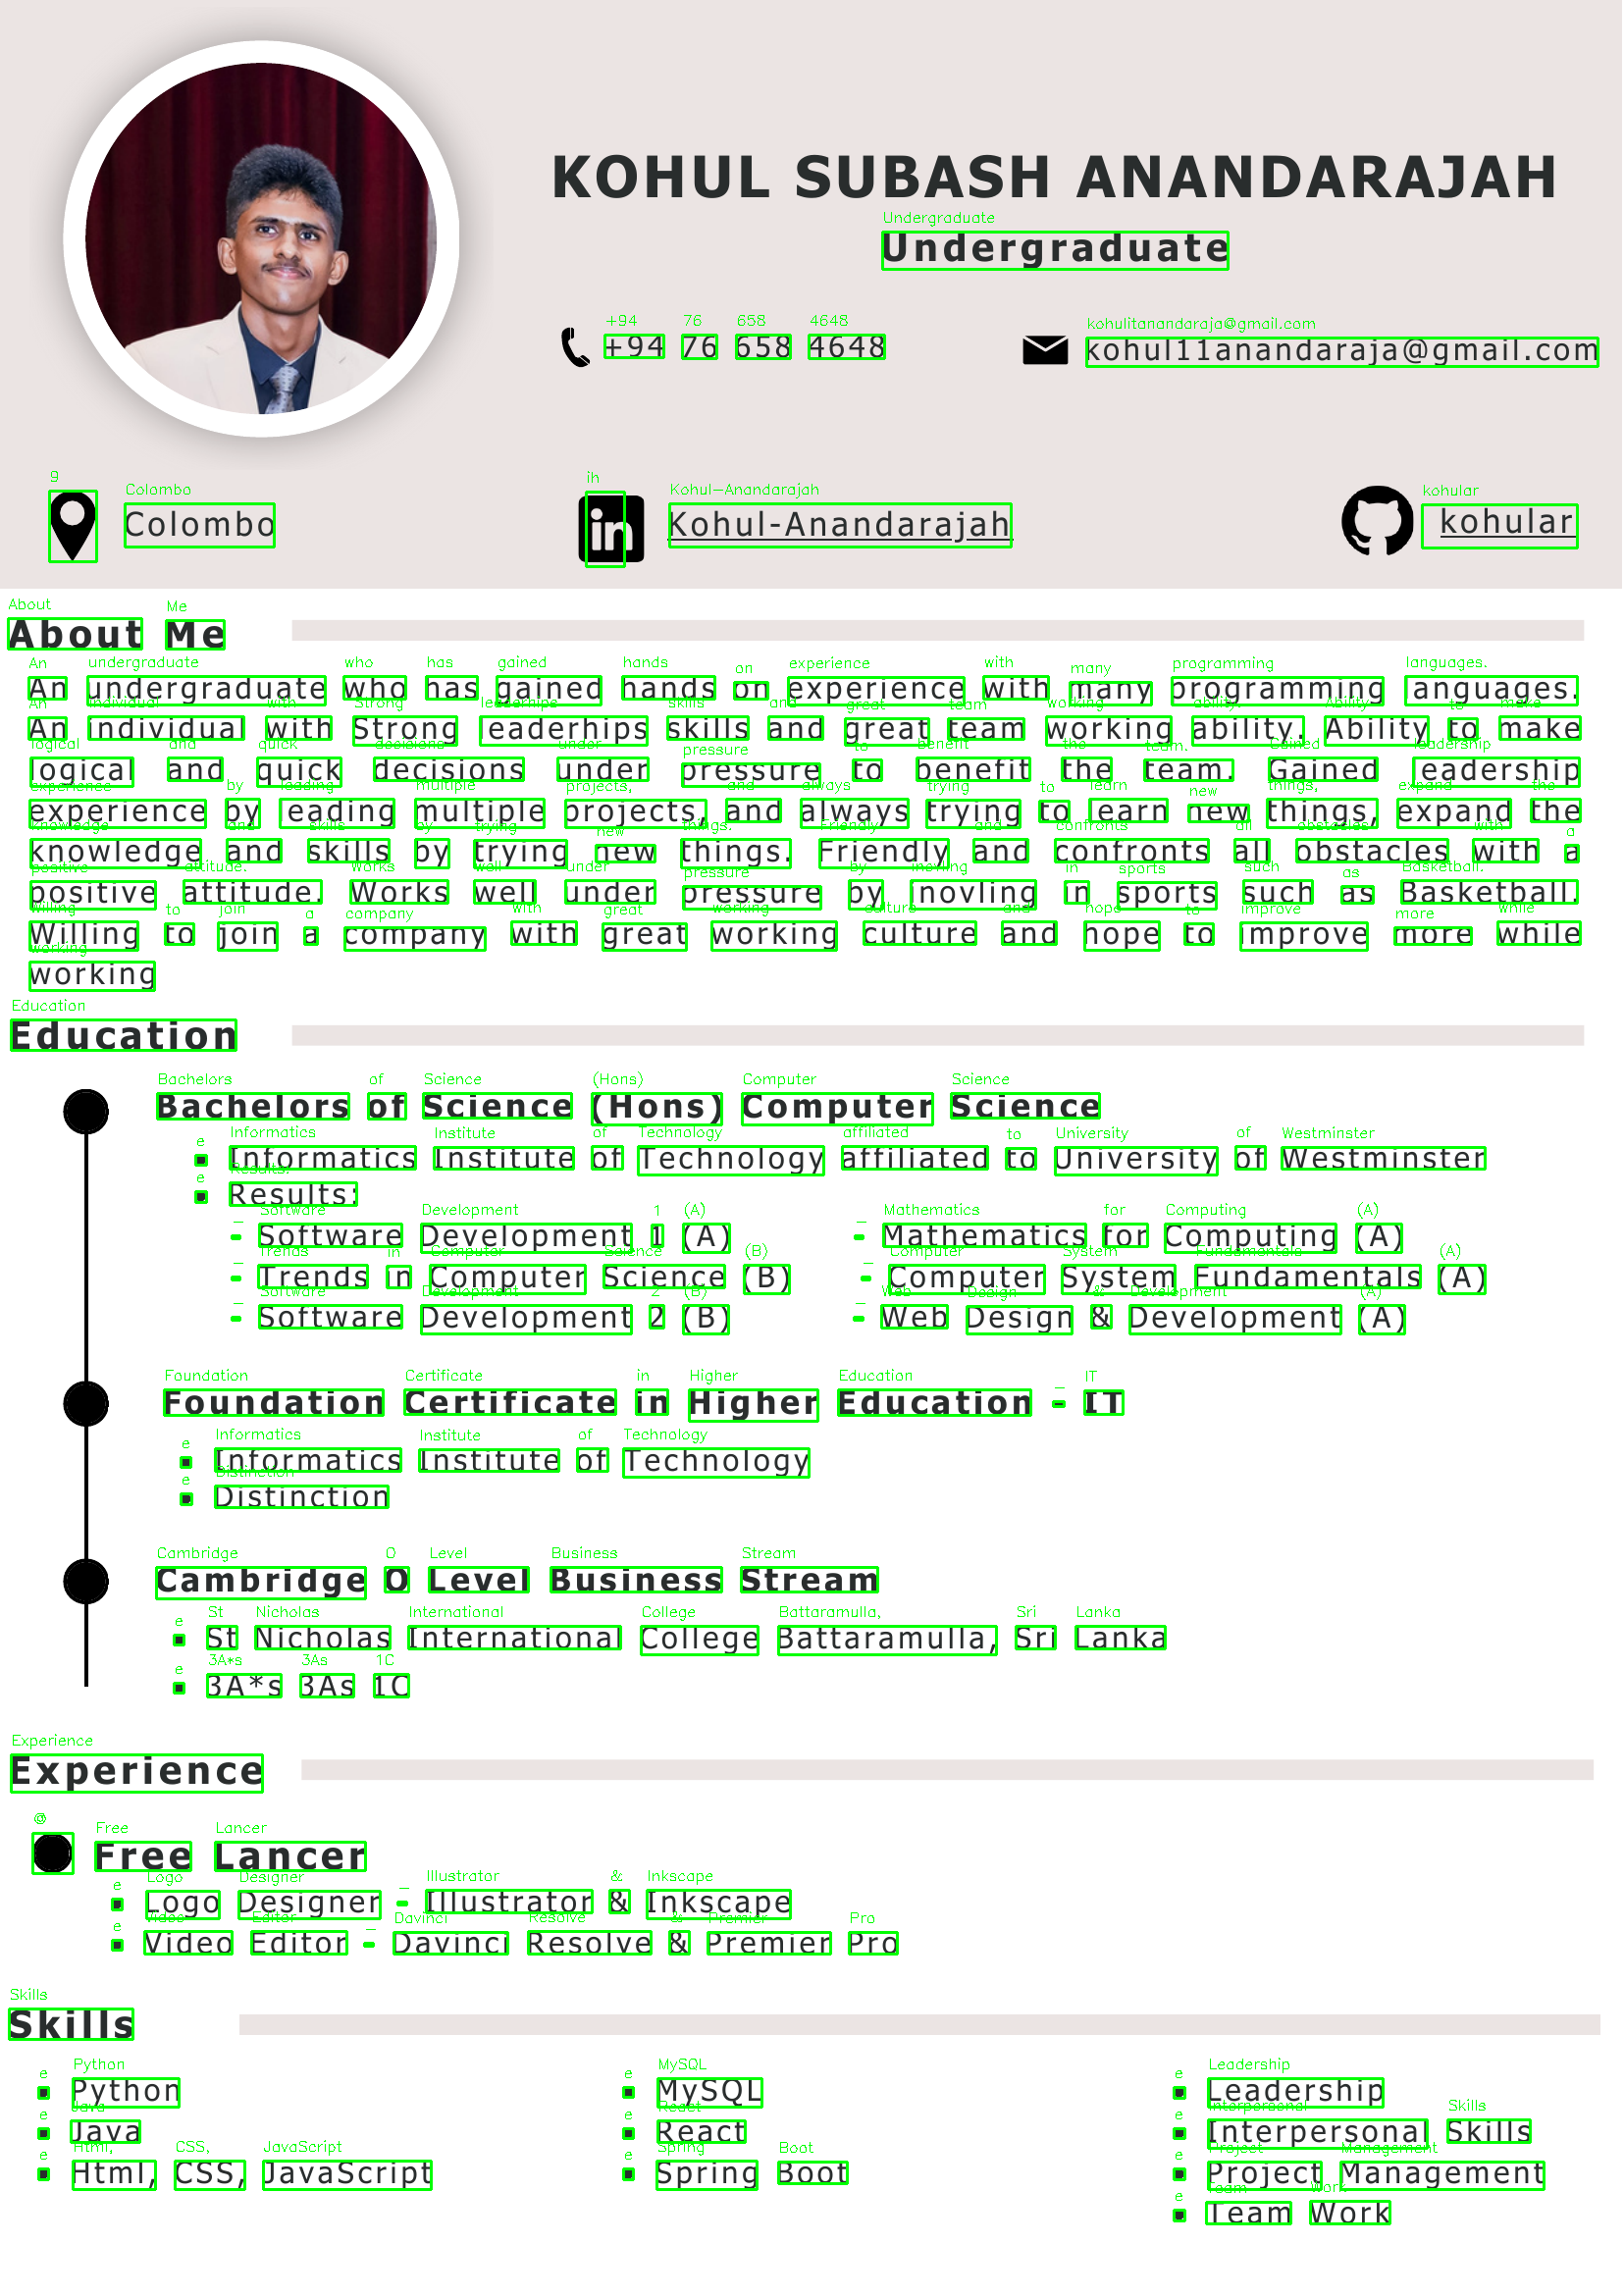

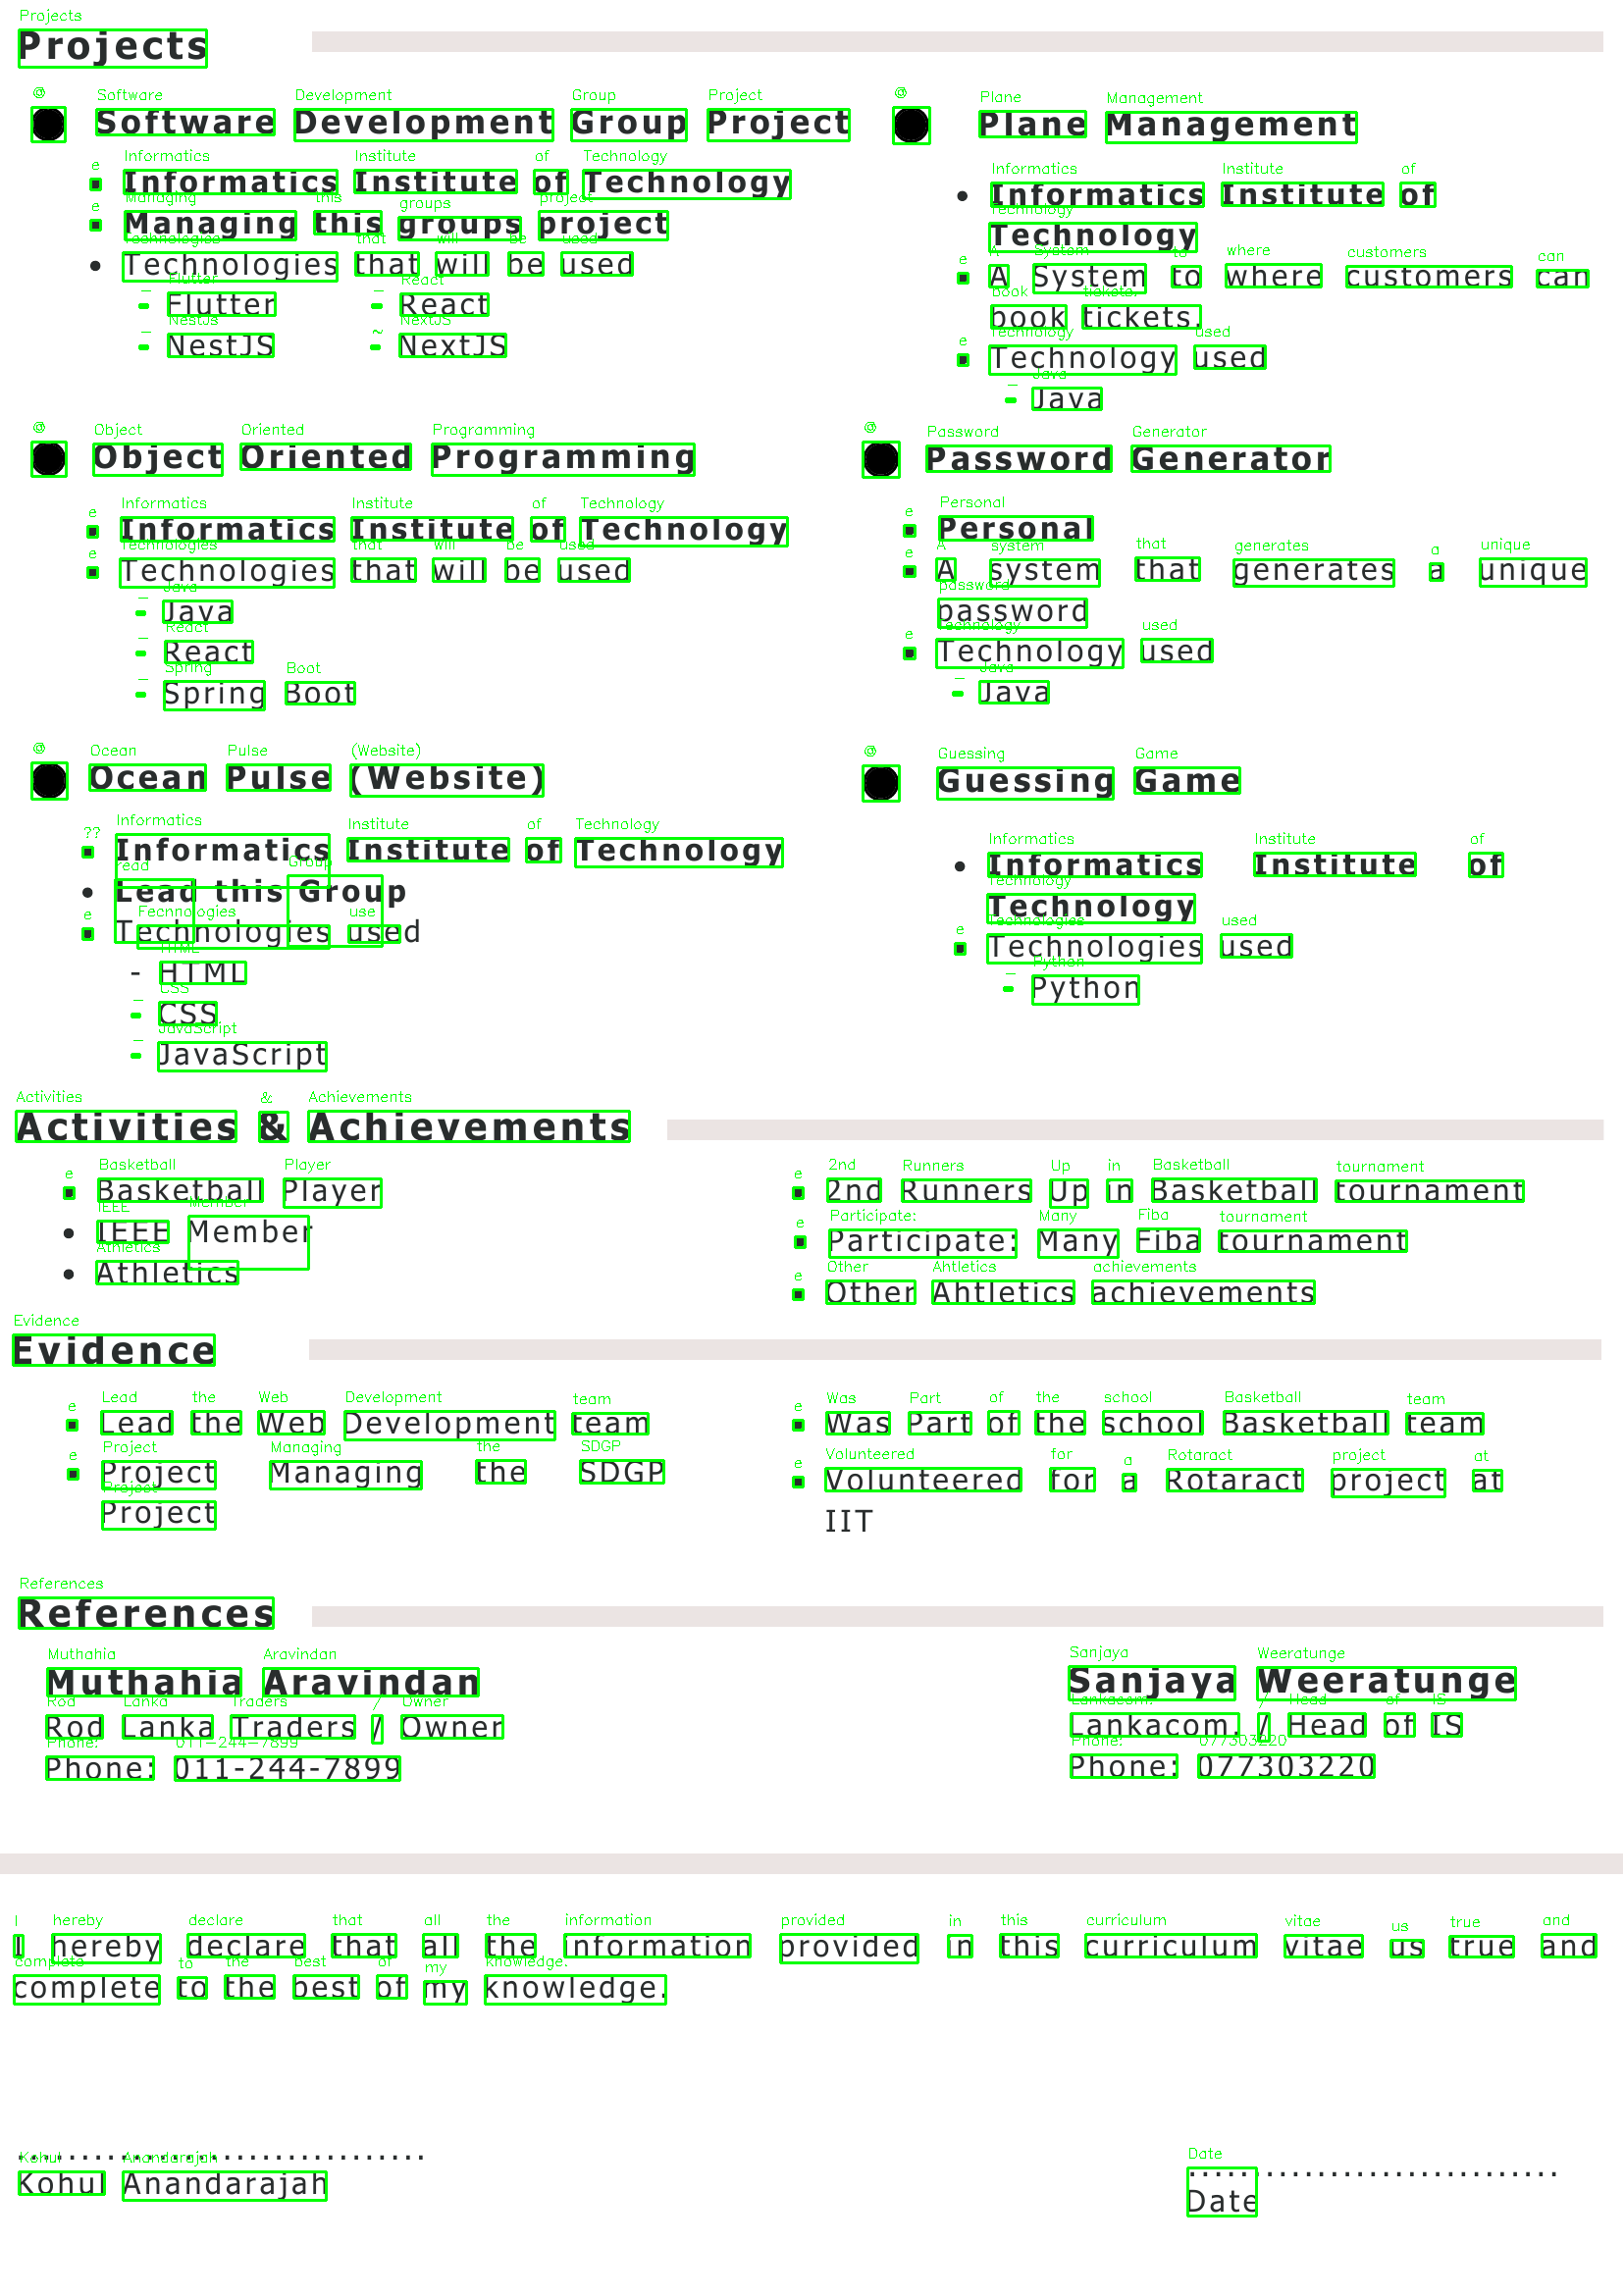

Extracted High-Confidence Text:
Undergraduate +94 76 658 4648 kohulitanandaraja@gmail.com 9 Colombo ih Kohul-Anandarajah kohular About Me An undergraduate who has gained hands on experience with many programming languages. An individual with Strong leaderhips skills and great team working ability. Ability to make logical and quick decisions under pressure to benefit the team. Gained leadership experience by leading multiple projects, and always trying to learn new things, expand the knowledge and skills by trying new things. Friendly and confronts all obstacles with a positive attitude. Works well under pressure by inovling in sports such as Basketball. Willing to join a company with great working culture and hope to improve more while working Education Bachelors of Science (Hons) Computer Science e Informatics Institute of Technology affiliated to University of Westminster e Results: - Software Development 1 (A) - Mathematics for Computing (A) - Trends in Computer Science (B) - Comput

In [85]:
# Convert PDF pages to images
def convert_pdf_to_images(pdf_path):
    return convert_from_path(pdf_path)

# Perform OCR on images with word bounding boxes and confidence filtering
def ocr_image_with_word_boxes(image, myconfig):
    return pytesseract.image_to_data(image, config=myconfig)

# Convert PIL image to OpenCV format
def pil_to_opencv(pil_image):
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Example usage
pdf_path = "kohul.pdf"  # Replace with your file path
images = convert_pdf_to_images(pdf_path)

# OCR configuration (optional)
myconfig = r'--oem 3 --psm 6'

# Store extracted high-confidence words
high_confidence_words = []

for pil_img in images:
    # Convert PIL image to OpenCV image
    img = pil_to_opencv(pil_img)
    height, width, _ = img.shape

    # Perform OCR and get word-level bounding box data
    data = ocr_image_with_word_boxes(img, myconfig)

    # Parse the bounding box data
    for i, line in enumerate(data.splitlines()):
        if i == 0:  # Skip the first line (header)
            continue
        fields = line.split("\t")
        if len(fields) >= 12 and fields[11].strip():  # Ensure word exists
            word = fields[11]
            confidence = int(fields[10])  # Confidence score
            if confidence >= 50:  # Filter words with >= 80% confidence
                x, y, w, h = map(int, fields[6:10])  # Extract bounding box coordinates
                # Draw a rectangle around the word
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # Put the detected word above the bounding box
                cv2.putText(img, word, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                # Append word to the high-confidence words list
                high_confidence_words.append(word)

    # Display the image with bounding boxes
    cv2_imshow(img)

# Join the high-confidence words into a single string
extracted_text = " ".join(high_confidence_words)

# Print the extracted text
print("Extracted High-Confidence Text:")
print(extracted_text)


In [47]:
from transformers import pipeline  # Hugging Face pipeline

# Hugging Face summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")  # Choose appropriate model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [57]:
from pdf2image import convert_from_path
import pytesseract
import cv2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert PDF pages to images
def convert_pdf_to_images(pdf_path):
    return convert_from_path(pdf_path)

# Perform OCR on images with word-level bounding boxes and confidence filtering
def ocr_image_with_word_boxes(image, myconfig):
    return pytesseract.image_to_data(image, config=myconfig)

# Convert PIL image to OpenCV format
def pil_to_opencv(pil_image):
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Extract text from a PDF and filter high-confidence words
def extract_text_from_pdf(pdf_path):
    images = convert_pdf_to_images(pdf_path)
    high_confidence_words = []
    myconfig = r'--oem 3 --psm 6'

    for pil_img in images:
        # Convert PIL image to OpenCV format
        img = pil_to_opencv(pil_img)
        height, width, _ = img.shape

        # Perform OCR
        data = ocr_image_with_word_boxes(img, myconfig)

        # Parse bounding box data and filter by confidence
        for i, line in enumerate(data.splitlines()):
            if i == 0:  # Skip header
                continue
            fields = line.split("\t")
            if len(fields) >= 12 and fields[11].strip():  # Ensure word exists
                word = fields[11]
                confidence = int(fields[10])  # Confidence score
                if confidence >= 50:  # Filter words with >= 80% confidence
                    high_confidence_words.append(word)

    return " ".join(high_confidence_words)  # Combine words into a single string

# Summarize text using Hugging Face
def summarize_text(text, min_length=200, max_length=250):
    if len(text.split()) < min_length:  # If text is shorter than min_length, skip summarization
        return text
    summary = summarizer(text, min_length=min_length, max_length=max_length, truncation=True)
    return summary[0]["summary_text"]  # Return the summarized text

# Paths to the CV PDFs
cv_paths = ["kohul.pdf", "arkashi.pdf", "haritha.pdf", "sakindu.pdf"]  # Replace with actual paths
all_cv_details = {}

# Extract and summarize text from each CV
for cv_path in cv_paths:
    print(f"Processing {cv_path}...")
    extracted_text = extract_text_from_pdf(cv_path)
    summarized_text = summarize_text(extracted_text)
    all_cv_details[cv_path] = {"Raw Text": extracted_text, "Summarized Text": summarized_text}

Processing kohul.pdf...
Processing arkashi.pdf...
Processing haritha.pdf...
Processing sakindu.pdf...


In [58]:
# Function to print text with a newline every 15 words
def print_text_with_newlines(text, words_per_line=15):
    words = text.split()  # Split text into a list of words
    for i in range(0, len(words), words_per_line):
        print(' '.join(words[i:i+words_per_line]))  # Join the next 15 words into a line and print

# Print raw text and summarized text
for path, details in all_cv_details.items():
    print(f"Details for {path}:\n")

    # Print the raw text with newlines every 15 words
    print(f"Raw Text (with newlines every 15 words):")
    print_text_with_newlines(details["Raw Text"], words_per_line=15)

    # Print the summarized text with newlines every 15 words
    print(f"\nSummarized Text (with newlines every 15 words):")
    print_text_with_newlines(details["Summarized Text"], words_per_line=15)

    print("\n")


Details for kohul.pdf:

Raw Text (with newlines every 15 words):
Undergraduate +94 76 658 4648 kohulitanandaraja@gmail.com 9 Colombo Kohul-Anandarajah kohular About Me An undergraduate who
has gained hands on experience with many programming languages. An individual with Strong leaderhips skills
and great team working ability. Ability to make logical and quick decisions under pressure to
benefit the team. Gained leadership experience by leading multiple projects, and always trying to learn
new things, expand the knowledge and skills by trying new things. Friendly and confronts all
obstacles with a positive attitude. Works well under pressure by inovling in sports such as
Basketball. Willing to join a company with great working culture and hope to improve more
while working Education Bachelors of Science (Hons) Computer Science e Informatics Institute of Technology affiliated
to University of Westminster e Results: - Software Development 1 (A) - Mathematics for Computing
(A) - Trends in

In [84]:
# User Prompt for Similarity Check
basic_prompt = "looking for a computer science undergraduate"
keywords = "HTML, CSS, JavaScript, React, Node.js, Vue.js, Angular, REST APIs, Web Development, Front-end, Back-end, Full-stack, Web Design"

user_prompt = basic_prompt+keywords

# Vectorize summarized CVs and User Prompt using TF-IDF
summarized_texts = [details["Summarized Text"] for details in all_cv_details.values()]
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=10)  # Limit to top features
cv_tfidf_matrix = tfidf_vectorizer.fit_transform(summarized_texts)  # Fit and transform summarized CV texts
user_prompt_tfidf = tfidf_vectorizer.transform([user_prompt])  # Transform user prompt

# Calculate cosine similarity between user prompt and each summarized CV
similarities = cosine_similarity(user_prompt_tfidf, cv_tfidf_matrix)[0]  # 1D array of similarities

# Rank CVs by similarity score
ranked_indices = np.argsort(similarities)[::-1]  # Sort in descending order
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i]) for i in ranked_indices]

# Display ranked CVs
print("\nRanked CVs based on similarity to user prompt:")
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

# Display the most relevant CV's summarized text
if ranked_cvs:
    most_relevant_cv_path = ranked_cvs[0][0]
    print(f"\nMost Relevant CV ({most_relevant_cv_path}):\n")
    print(all_cv_details[most_relevant_cv_path]["Summarized Text"])


Ranked CVs based on similarity to user prompt:
Rank 1: arkashi.pdf (Similarity Score: 0.65)
Rank 2: kohul.pdf (Similarity Score: 0.52)
Rank 3: sakindu.pdf (Similarity Score: 0.18)
Rank 4: haritha.pdf (Similarity Score: 0.00)

Most Relevant CV (arkashi.pdf):

Akarshani is an assistant at Informatics Institute of Technology, Colombo, Sri Lanka. He has worked for TurboGen Consultancy (Pvt) Ltd, NetLink Technologies, and Sirimavo Bandaranaikee Vidyalaya. He is a graduate of Robert Gorden University, Scotland, UK, with a Bsc in Artificial Intelligence and Data Science with First class honors. He also has a Ph.D. in Computer Vision from the University of California, Santa Cruz. His latest project is Med-X, which extracts brain tumor type from brain MRI images and brain tumor location. It also uses LIME to add more interpretability for vision models. His next project will be to build a home AI system that has optimal power control: Edge AI / Computer vision / Arduino / ANN Firebase, React / 

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger
import re
from pdfminer.high_level import extract_text  # Assuming you have pdfminer installed

# Load the NER tagger
tagger = SequenceTagger.load('ner')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

2024-11-26 18:44:05,224 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


# ***Extract full text from cv***

In [ ]:
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

# ***Get full name***

In [ ]:
# Function to extract full name using Flair
def extract_full_name_with_flair(text):
    top_of_cv = text[:500]
    sentence = Sentence(top_of_cv)
    tagger.predict(sentence)

    # Extract PERSON entities from the tagged sentence
    name_entities = []
    for entity in sentence.get_spans('ner'):
        if entity.get_label("ner").value == "PER":
            name_entities.append(entity.text)

    if name_entities:
        return " ".join(name_entities)

    # Fallback to regex if Flair doesn't find a name
    name_regex = r"([A-Z][a-z]+(?:\s+[A-Z][a-z]+)+)"
    name_matches = re.findall(name_regex, top_of_cv)

    if name_matches:
        return name_matches[0]

    return "Name not found."

# ***References***

In [ ]:
# Function to extract contact info
def extract_contact_info(text):
    possible_reference_keywords = ["references", "referees", "non related references"]
    reference_section_pos = len(text)

    # Locate the references section (if it exists)
    for keyword in possible_reference_keywords:
        pos = text.lower().find(keyword)
        if pos != -1 and pos < reference_section_pos:
            reference_section_pos = pos

    # Search for contact info before the references section
    contact_text = text[:reference_section_pos]

    # Regular expressions for phone and email
    phone_regex = r"(\+?\d{1,4}[\s-]?)?(\d{9,10})"
    email_regex = r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"

    # Extract phone and email
    phone_matches = re.findall(phone_regex, contact_text)
    email_matches = re.findall(email_regex, contact_text)

    # Get the first phone and email (likely belonging to the CV owner)
    phone = phone_matches[0][1] if phone_matches else None
    email = email_matches[0] if email_matches else None

    contact_info = f"Phone: {phone}, Email: {email}"
    return contact_info if phone or email else "Contact Info not found."

# ***Other sections we are extracting from the text***

In [ ]:
# Define alternative keywords for sections
section_keywords = {
    "Job Role": ["Job Role", "Position", "Current Position", "Objective", "Professional Summary"],
    "Qualifications": ["Qualifications", "Education", "Academic Background"],
    "Experiences": ["Experiences", "Experience", "Professional Experience", "Work History", "Employment"],
    "Address": ["Address", "Location", "Residence"],
    "Skills": ["Skills", "Technical Skills", "Core Competencies"],
    "Projects": ["Projects", "Project Work", "Key Projects", "Research Projects"],
    "References": ["References", "Referees", "Non related References"]
}

In [ ]:
# Function to dynamically extract a specific section
def extract_section(text, section_name):
    text_lower = text.lower()

    section_start = -1
    for keyword in section_keywords[section_name]:
        keyword_lower = keyword.lower()
        section_start = text_lower.find(keyword_lower)
        if section_start != -1:
            break

    if section_start == -1:
        return f"{section_name} section not found."

    next_section_start = len(text)
    for key, alternatives in section_keywords.items():
        if key != section_name:
            for alt_keyword in alternatives:
                keyword_start = text_lower.find(alt_keyword.lower(), section_start + len(keyword_lower))
                if keyword_start != -1 and keyword_start < next_section_start:
                    next_section_start = keyword_start

    section_content = text[section_start:next_section_start].strip()
    return section_content

# ***Assigning possible job roles for the analysis***

In [ ]:
# Define a mapping of job roles to skills and project-related keywords
job_role_keywords = {
    "Software Developer": [ "programming", "python", "java", "c++", "git", "version control", "algorithms",
    "data structures", "object-oriented", "testing", "debugging", "problem-solving",
    "api", "full stack", "backend", "frontend"],

    "Data Scientist": [ "machine learning", "data analysis", "python", "r", "statistics", "data mining",
    "modeling", "big data", "data visualization", "deep learning", "pandas", "numpy",
    "matplotlib", "neural networks", "artificial intelligence", "regression",
    "classification", "clustering"],

    "Web Developer": ["html", "css", "javascript", "web", "react", "angular", "frontend", "backend",
    "php", "sql", "mysql", "bootstrap", "node.js", "express", "ui/ux", "web design",
    "responsive design", "jquery", "ajax", "api integration"],

    "Mobile App Developer": [ "android", "ios", "flutter", "react native", "kotlin", "swift", "mobile app",
    "development", "mobile ui", "mobile ux", "cross-platform", "native app",
    "app store", "google play", "firebase", "push notifications", "in-app purchases"],

    "Project Manager": [ "leadership", "project management", "team", "planning", "agile", "scrum", "jira",
    "kanban", "waterfall", "communication", "risk management", "budgeting",
    "stakeholder management", "scheduling", "milestones", "resource allocation",
    "time management", "project charter", "gantt chart"],

    "DevOps Engineer": ["docker", "kubernetes", "ci/cd", "automation", "aws", "azure", "cloud",
    "infrastructure", "terraform", "ansible", "jenkins", "linux", "bash scripting",
    "monitoring", "logging", "scaling", "containers", "orchestration", "security",
    "microservices", "networking"]
}

In [ ]:
# Function to determine all possible job roles based on skills and projects
def determine_possible_job_roles(skills_text, projects_text):
    combined_text = f"{skills_text} {projects_text}".lower()  # Combine and convert to lowercase for matching

    matched_roles = {}

    # Check for keyword matches in both skills and projects
    for role, keywords in job_role_keywords.items():
        for keyword in keywords:
            if keyword in combined_text:
                matched_roles[role] = matched_roles.get(role, 0) + 1  # Count the keyword match for ranking

    # Sort roles by the number of keyword matches
    if matched_roles:
        sorted_roles = sorted(matched_roles.items(), key=lambda x: x[1], reverse=True)
        return [(role, count) for role, count in sorted_roles]  # Return all roles with match counts

    return [("No matching job roles found.", 0)]

# ***Cv paths***

In [ ]:
# List of PDF paths
pdf_paths = [
    "/content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf",
    "/content/drive/My Drive/IIT Degree/haritha.pdf",
    "/content/drive/My Drive/IIT Degree/kohul.pdf",
    "/content/drive/My Drive/IIT Degree/sakindu.pdf",
    "/content/drive/My Drive/IIT Degree/arkashi.pdf",
]

# ***map to store all data***

In [ ]:
# Map to store details from all CVs
all_cv_details = {}


In [ ]:
# Loop through each PDF and extract details
for pdf_path in pdf_paths:
    extracted_text = extract_text_from_pdf(pdf_path)

    # Extracting various fields
    full_name = extract_full_name_with_flair(extracted_text)
    contact_info = extract_contact_info(extracted_text)
    job_role = extract_section(extracted_text, "Job Role")
    qualifications = extract_section(extracted_text, "Qualifications")
    experiences = extract_section(extracted_text, "Experiences")
    address = extract_section(extracted_text, "Address")
    skills = extract_section(extracted_text, "Skills")
    projects = extract_section(extracted_text, "Projects")
    references = extract_section(extracted_text, "References")

    # Determine possible job roles based on extracted skills and projects
    possible_job_roles = determine_possible_job_roles(skills, projects)

    # Store extracted details in the map (dictionary)
    extracted_details = {
        "Full Name": full_name,
        "Contact Info": contact_info,
        "Job Role": job_role,
        "Qualifications": qualifications,
        "Experiences": experiences,
        "Address": address,
        "Skills": skills,
        "Projects": projects,
        "References": references,
        "Possible Job Roles": [f"{role} (Matched Keywords: {count})" for role, count in possible_job_roles]
    }

    # Use the PDF path as the key to store the details in the map
    all_cv_details[pdf_path] = extracted_details

# Print all extracted details
for path, details in all_cv_details.items():
    print(f"Details for {path}:\n")
    for key, value in details.items():
        print(f"{key}: {value}\n")
        print("------------------------NEXT-----------------------\n")
    print("-------------------------------------------------\n")


Details for /content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf:

Full Name: Don Esandu Meth Obadaaarachchi

------------------------NEXT-----------------------

Contact Info: Phone: 767790567, Email: eobadaarachchi@gmail.com

------------------------NEXT-----------------------

Job Role: Job Role section not found.

------------------------NEXT-----------------------

Qualifications: Education

Bachelor of Science (Hons) in Artificial Intelligence and Data Science 

2022 – Present

Informatics Institute of Technology affiliated to Robert Gordon University, UK
 Results= Computational Mathematics - (B) , Programming Fundamentals - (B) 

        Computer System Fundamentals - (A) , DataBase Systems - (B) , Structures and Algorithms - (A) , 
        Web Development - (A) , Artificial Intelligence - (A), Advance Mathematics for Data Science - (A),  
        Object Oriented Programming - (B)  

   Cambridge A Levels Science Stream 

Lyceum International School Nugegoda, Sri L

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Combine all sections from the extracted text into one
def combine_cv_sections(cv_details):
    sections = [
        #cv_details.get("Full Name", ""),
        cv_details.get("Job Role", ""),
        cv_details.get("Qualifications", ""),
        cv_details.get("Experiences", ""),
        cv_details.get("Skills", ""),
        cv_details.get("Projects", ""),
    ]
    return " ".join(sections)

# Combine all CVs into a list of strings
cv_texts = [combine_cv_sections(details) for details in all_cv_details.values()]

# User Prompt
user_prompt = "LOOKING for a person who has done ai data science , machine learning projects"

# Vectorize CVs and User Prompt using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=10)  # Limit to top 5000 features
cv_tfidf_matrix = tfidf_vectorizer.fit_transform(cv_texts)  # Fit and transform CVs
user_prompt_tfidf = tfidf_vectorizer.transform([user_prompt])  # Transform user prompt

# Calculate cosine similarity between user prompt and each CV
similarities = cosine_similarity(user_prompt_tfidf, cv_tfidf_matrix)[0]  # Returns a 1D array of similarities

# Rank CVs by similarity score
ranked_indices = np.argsort(similarities)[::-1]  # Sort in descending order
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i]) for i in ranked_indices]

# Display ranked CVs
print("Ranked CVs based on similarity to user prompt:")
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

Ranked CVs based on similarity to user prompt:
Rank 1: /content/drive/My Drive/IIT Degree/arkashi.pdf (Similarity Score: 0.23)
Rank 2: /content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf (Similarity Score: 0.13)
Rank 3: /content/drive/My Drive/IIT Degree/sakindu.pdf (Similarity Score: 0.07)
Rank 4: /content/drive/My Drive/IIT Degree/kohul.pdf (Similarity Score: 0.03)
Rank 5: /content/drive/My Drive/IIT Degree/haritha.pdf (Similarity Score: 0.01)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Map to store details from all CVs
all_cv_details = {}

# List to store raw extracted text for vectorization
raw_texts = []

# Loop through each PDF and extract details
for pdf_path in pdf_paths:
    extracted_text = extract_text_from_pdf(pdf_path)
    raw_texts.append(extracted_text)  # Store the entire raw text for vectorization

    # Extracting various fields
    full_name = extract_full_name_with_flair(extracted_text)
    contact_info = extract_contact_info(extracted_text)
    job_role = extract_section(extracted_text, "Job Role")
    qualifications = extract_section(extracted_text, "Qualifications")
    experiences = extract_section(extracted_text, "Experiences")
    address = extract_section(extracted_text, "Address")
    skills = extract_section(extracted_text, "Skills")
    projects = extract_section(extracted_text, "Projects")
    references = extract_section(extracted_text, "References")

    # Determine possible job roles based on extracted skills and projects
    possible_job_roles = determine_possible_job_roles(skills, projects)

    # Store extracted details in the map (dictionary)
    extracted_details = {
        "Full Name": full_name,
        "Contact Info": contact_info,
        "Job Role": job_role,
        "Qualifications": qualifications,
        "Experiences": experiences,
        "Address": address,
        "Skills": skills,
        "Projects": projects,
        "References": references,
        "Raw Text": extracted_text,  # Add the entire raw text to the dictionary
        "Possible Job Roles": [f"{role} (Matched Keywords: {count})" for role, count in possible_job_roles]
    }

    # Use the PDF path as the key to store the details in the map
    all_cv_details[pdf_path] = extracted_details


In [ ]:
# User Prompt
user_prompt = "LOOKING for a person who has done ai data science , machine learning projects"

# Vectorize CVs and User Prompt using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=10)  # Limit to top features
cv_tfidf_matrix = tfidf_vectorizer.fit_transform(raw_texts)  # Fit and transform raw texts
user_prompt_tfidf = tfidf_vectorizer.transform([user_prompt])  # Transform user prompt

# Calculate cosine similarity between user prompt and each CV
similarities = cosine_similarity(user_prompt_tfidf, cv_tfidf_matrix)[0]  # Returns a 1D array of similarities

# Rank CVs by similarity score
ranked_indices = np.argsort(similarities)[::-1]  # Sort in descending order
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i]) for i in ranked_indices]

# Display ranked CVs
print("Ranked CVs based on similarity to user prompt:")
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

# Optional: Display the most relevant CV's raw text
if ranked_cvs:
    most_relevant_cv_path = ranked_cvs[0][0]
    print(f"\nMost Relevant CV ({most_relevant_cv_path}):\n")
    print(all_cv_details[most_relevant_cv_path]["Raw Text"])

Ranked CVs based on similarity to user prompt:
Rank 1: /content/drive/My Drive/IIT Degree/arkashi.pdf (Similarity Score: 0.69)
Rank 2: /content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf (Similarity Score: 0.41)
Rank 3: /content/drive/My Drive/IIT Degree/sakindu.pdf (Similarity Score: 0.05)
Rank 4: /content/drive/My Drive/IIT Degree/kohul.pdf (Similarity Score: 0.00)
Rank 5: /content/drive/My Drive/IIT Degree/haritha.pdf (Similarity Score: 0.00)

Most Relevant CV (/content/drive/My Drive/IIT Degree/arkashi.pdf):

RAMANAYAKE ARACHCHIGE DONA
CHETHANA AKARSHANI

Bsc. (Hons) Artificial Intelligence  and Data Science

Date of birth: 20/08/2000 

      |       phone number: 0719993444

|         Instagram: akarshani_r

|      Email: akarshaniramanayake0820@gmail.com       |

LinkedIn: www.linkedin.com/in/akarshani

Experience

Assistant lecturer (Full-time)
Informatics Institute of Technology

Aug 2024- Present 

Assigned  to  do  tutorials  on  computer  systems  fundamentals

In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load a pre-trained transformer model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small and efficient model

# Encode CV texts and user prompt into dense vector embeddings
cv_embeddings = model.encode(raw_texts, convert_to_tensor=True)  # List of CV texts
user_prompt_embedding = model.encode(user_prompt, convert_to_tensor=True)  # User prompt

# Calculate cosine similarity between user prompt and each CV embedding
similarities = util.cos_sim(user_prompt_embedding, cv_embeddings)[0]  # 1D tensor of similarities

# Rank CVs by similarity score
ranked_indices = similarities.argsort(descending=True)  # Sort in descending order
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i].item()) for i in ranked_indices]

# Display ranked CVs
print("Ranked CVs based on similarity to user prompt (using Transformer embeddings):")
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

# Optional: Display the most relevant CV's raw text
if ranked_cvs:
    most_relevant_cv_path = ranked_cvs[0][0]
    print(f"\nMost Relevant CV ({most_relevant_cv_path}):\n")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Ranked CVs based on similarity to user prompt (using Transformer embeddings):
Rank 1: /content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf (Similarity Score: 0.44)
Rank 2: /content/drive/My Drive/IIT Degree/sakindu.pdf (Similarity Score: 0.37)
Rank 3: /content/drive/My Drive/IIT Degree/haritha.pdf (Similarity Score: 0.34)
Rank 4: /content/drive/My Drive/IIT Degree/arkashi.pdf (Similarity Score: 0.26)
Rank 5: /content/drive/My Drive/IIT Degree/kohul.pdf (Similarity Score: 0.02)

Most Relevant CV (/content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf):



In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load the state-of-the-art embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate embeddings for raw CV texts and the user prompt
cv_embeddings = model.encode(raw_texts, convert_to_tensor=True)  # CVs
user_prompt_embedding = model.encode(user_prompt, convert_to_tensor=True)  # User prompt

# Compute cosine similarity
similarities = util.cos_sim(user_prompt_embedding, cv_embeddings)[0]  # 1D tensor

# Rank CVs by similarity
ranked_indices = similarities.argsort(descending=True)
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i].item()) for i in ranked_indices]

# Print results
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Rank 1: /content/drive/My Drive/IIT Degree/IIT esandu Obadaarachchi_CV.pdf (Similarity Score: 0.57)
Rank 2: /content/drive/My Drive/IIT Degree/sakindu.pdf (Similarity Score: 0.52)
Rank 3: /content/drive/My Drive/IIT Degree/haritha.pdf (Similarity Score: 0.44)
Rank 4: /content/drive/My Drive/IIT Degree/arkashi.pdf (Similarity Score: 0.36)
Rank 5: /content/drive/My Drive/IIT Degree/kohul.pdf (Similarity Score: 0.14)


In [ ]:
!pip install InstructorEmbedding

In [ ]:
from InstructorEmbedding import INSTRUCTOR

# Load the model
model = INSTRUCTOR('hkunlp/instructor-xl')

# Add instructions for better embeddings
cv_embeddings = model.encode([("Represent the CV for ranking:", text) for text in raw_texts])
user_prompt_embedding = model.encode([("Represent the user query for ranking:", user_prompt)])[0]

# Compute cosine similarity
similarities = util.cos_sim(user_prompt_embedding, cv_embeddings)[0]  # 1D tensor

# Rank CVs
ranked_indices = similarities.argsort(descending=True)
ranked_cvs = [(list(all_cv_details.keys())[i], similarities[i].item()) for i in ranked_indices]

# Print results
for rank, (cv_path, similarity) in enumerate(ranked_cvs, 1):
    print(f"Rank {rank}: {cv_path} (Similarity Score: {similarity:.2f})")

TypeError: INSTRUCTOR._load_sbert_model() got an unexpected keyword argument 'token'